## Floating-point arithmetic

Real numbers are stored on a computer following the IEEE floating-point standard:

1. **half precision** using 16 bits (Julia type: `Float16`)
2. **single precision** using 32 bits (Julia type: `Float32`)
3. **double precision** using 64 bits (Julia type: `Float64`)

Julia also has an **arbitrary precision** floating-point data type called `BigFloat`. It is excellent if you need more precision, but it is also much slower.

In [1]:
?FloatingPoint

INFO: Loading help data...


DataType   : FloatingPoint
  supertype: Real
  subtypes : {BigFloat,Float16,Float32,Float64}


## Description of IEEE double floating-point format (`Float64`)

Suppose $x$ is a floating-point number stored in the following 64-bits:

| 1 | 2 | $\cdots$ | 12 | 13 | $\cdots$ | 64 |
|:-:|:-:|:--------:|:--:|:--:|:--------:|:--:|
|$s$|$e_{10}$| $\cdots$ |$e_0$|$f_1$|$\cdots$|$f_{52}$|

- 1 bit $s$ represents the **sign**
- 11 bits $e_{10} \cdots e_{0}$ represent the **exponent**
- 52 bits $f_1 \cdots f_{52}$ represent the **fraction** (a.k.a. the mantissa or significand)

Then

$$ x = (-1)^s \left[1.f_1 \cdots f_{52}\right]_2 \times 2^{(e-1023)}.$$

Notes: 

- $x$ is **normalized** to have its first digit nonzero.
- $e = \left[e_{10} \cdots e_{0}\right]_2 = e_{10} 2^{10} + \cdots + e_1 2^1 + e_0 2^0 \in \left[0, 2^{11}-1\right] = [0, 2047]$
- $e = 0$ and $e = 2047$ are reserved for special floating-point values, so 

$$e \in [1, 2046]$$

- the "$-1023$" in the exponent is called the **bias**:  $e-1023 \in [-1022,1023]$
- $\left[1.f_1 \cdots f_{52}\right]_2 = 1 + \frac{f_1}{2^1} + \frac{f_2}{2^2} + \cdots + \frac{f_{52}}{2^{52}}$


## Example

$$
\begin{split}
x & = -[1.101101]_2 \times 2^{(1026-1023)} \\
  & = -[1.101101]_2 \times 2^{3} \\
  & = -[1101.101]_2 \\
  & = -\left(1 \cdot 8 + 1 \cdot 4 + 0 \cdot 2 + 1 \cdot 1 + 1 \cdot \frac{1}{2} + 0 \cdot \frac{1}{4} + 1 \cdot \frac{1}{8}\right)  \\
  & = -13.625
\end{split}
$$

In [2]:
?bits

Base.bits(n)

   A string giving the literal bit representation of a number.


In [3]:
x = -13.625
bits(x)

"1100000000101011010000000000000000000000000000000000000000000000"

In [4]:
s = bits(x)[1]
e = bits(x)[2:12]
f = bits(x)[13:64]
s, e, f

('1',"10000000010","1011010000000000000000000000000000000000000000000000")

In [5]:
int(0b10000000010)

1026

## Example

Even if a number can be represented exactly in base-10 with a finite number of digits, it may require an infinite number of digits in base-2.

$$
0.1 = \left[0.000110011001\ldots\right]_2 = \left[1.\overline{1001}\right]_2 \times 2^{-4}
$$

Therefore, $0.1$ cannot be represented exactly as a floating-point number.

In [6]:
x = 0.1
s = bits(x)[1]
e = bits(x)[2:12]
f = bits(x)[13:64]
s, e, f

('0',"01111111011","1001100110011001100110011001100110011001100110011010")

In [7]:
int(0b01111111011) - 1023

-4

In [8]:
x = big(0.1)

1.000000000000000055511151231257827021181583404541015625e-01 with 256 bits of precision

## Limits of floating-point numbers

- **Largest** `Float64` $= \left(2 - 2^{-52}\right) \times 2^{1023} \approx 2 \times 10^{308}$
- **Smallest positive normalized** `Float64` $= 2^{-1022} \approx 2 \times 10^{-308}$

In [9]:
x = realmax(Float64)

1.7976931348623157e308

In [10]:
bits(x)

"0111111111101111111111111111111111111111111111111111111111111111"

In [11]:
x = realmin(Float64)

2.2250738585072014e-308

In [12]:
bits(x)

"0000000000010000000000000000000000000000000000000000000000000000"

The IEEE floating-point standard also allows **de-normalized** numbers that are smaller than `realmin(Float64)`. De-normalized floats are represented by $e = 0$.

In [3]:
# Let's compute the smallest Float64 that is not zero

e = -1022
x = 2.0^e

while x != 0.0
    @printf "%24.16e = 2.0^(%5d)\n" x e
    x /= 2.0
    e -= 1
end

x, e

 2.2250738585072014e-308 = 2.0^(-1022)
 1.1125369292536007e-308 = 2.0^(-1023)
 5.5626846462680035e-309 = 2.0^(-1024)
 2.7813423231340017e-309 = 2.0^(-1025)
 1.3906711615670009e-309 = 2.0^(-1026)
 6.9533558078350043e-310 = 2.0^(-1027)
 3.4766779039175022e-310 = 2.0^(-1028)
 1.7383389519587511e-310 = 2.0^(-1029)
 8.6916947597937554e-311 = 2.0^(-1030)
 4.3458473798968777e-311 = 2.0^(-1031)
 2.1729236899484389e-311 = 2.0^(-1032)
 1.0864618449742194e-311 = 2.0^(-1033)
 5.4323092248710971e-312 = 2.0^(-1034)
 2.7161546124355486e-312 = 2.0^(-1035)
 1.3580773062177743e-312 = 2.0^(-1036)
 6.7903865310888714e-313 = 2.0^(-1037)
 3.3951932655444357e-313 = 2.0^(-1038)
 1.6975966327722179e-313 = 2.0^(-1039)
 8.4879831638610893e-314 = 2.0^(-1040)
 4.2439915819305446e-314 = 2.0^(-1041)
 2.1219957909652723e-314 = 2.0^(-1042)
 1.0609978954826362e-314 = 2.0^(-1043)
 5.3049894774131808e-315 = 2.0^(-1044)
 2.6524947387065904e-315 = 2.0^(-1045)
 1.3262473693532952e-315 = 2.0^(-1046)
 6.6312368467664760e-316 

(0.0,-1075)

In [14]:
2.0^-1074, 2.0^-1075

(5.0e-324,0.0)

Therefore:

- **Smallest positive de-normalized** `Float64` $= 2^{-1074} \approx 5 \times 10^{-324}$

In [15]:
bits(2.0^-1074)

"0000000000000000000000000000000000000000000000000000000000000001"

## Other special floats

- `0.0` and `-0.0`: $$e_{10} \cdots e_0 = 0 \cdots 0 \quad \text{and} \quad f_1 \cdots f_{52} = 0 \cdots 0$$
- `Inf` and `-Inf`: $$e_{10} \cdots e_0 = 1 \cdots 1 \quad \text{and} \quad f_1 \cdots f_{52} = 0 \cdots 0$$
- `NaN` (not-a-number): $$e_{10} \cdots e_0 = 1 \cdots 1 \quad \text{and} \quad f_1 \cdots f_{52} \neq 0$$

From [Julia Manual: Mathematical Operations and Elementary Functions](http://julia.readthedocs.org/en/latest/manual/mathematical-operations/):

- `Inf` is equal to itself and greater than everything else except `NaN`.
- `-Inf` is equal to itself and less then everything else except `NaN`.
- `NaN` is not equal to, not less than, and not greater than anything, including itself.

In [16]:
bits(0.0)

"0000000000000000000000000000000000000000000000000000000000000000"

In [17]:
bits(-0.0)

"1000000000000000000000000000000000000000000000000000000000000000"

In [18]:
bits(Inf)

"0111111111110000000000000000000000000000000000000000000000000000"

In [19]:
bits(-Inf)

"1111111111110000000000000000000000000000000000000000000000000000"

In [20]:
bits(NaN)

"0111111111111000000000000000000000000000000000000000000000000000"

In [21]:
1.0*0.0

0.0

In [22]:
-1.0*0.0

-0.0

In [23]:
1.0/0.0

Inf

In [24]:
-1.0/0.0

-Inf

In [25]:
1.0/Inf

0.0

In [26]:
-1.0/Inf

-0.0

In [27]:
0.0/0.0

NaN

In [28]:
-0.0 < 0.0

false

In [5]:
1.0/-1e308

-1.0e-308

## Machine epsilon `eps(Float64)` and the unit roundoff $\eta$

- `1.0 + eps(Float64)` is the first `Float64` that is larger than `1.0`

$$\mathtt{eps(Float64)} = 2^{-52} \approx 2.2 \times 10^{-16}$$

- $\eta = $ `eps(Float64)/2.0` is the largest possible relative error due to roundoff

$$\eta = 2^{-53} \approx 1.1 \times 10^{-16}$$

In [30]:
eps(Float64)

2.220446049250313e-16

In [31]:
1.0 + eps(Float64) > 1.0

true

In [32]:
1.0 + eps(Float64)/2.0 == 1.0

true

## Roundoff error example

Suppose we are using a base-10 floating-point system with 4 significant digits, using `RoundNearest`:

$$
\begin{split}
\left( 1.112 \times 10^1 \right) \times \left( 1.112 \times 10^2 \right)
& = 1.236544 \times 10^3 \\
& \rightarrow 1.237 \times 10^3 = 1237
\end{split}
$$

The absolute error is $1237 - 1236.544 = 0.456$.

The relative error is $$\frac{0.456}{1236.544} \approx 0.0004 = 0.04 \%$$

In [33]:
0.456/1236.544

0.0003687697324155064

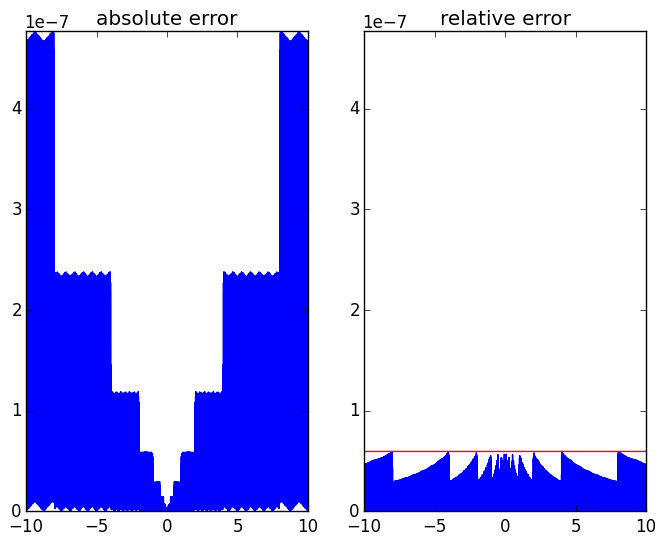

PyObject <matplotlib.text.Text object at 0x118adfc50>

In [34]:
# Compute the effect of roundoff error

η = eps(Float32)/2.0         # Compute the unit roundoff for Float32

x = linspace(-10, 10, 10000)   # 1000-element Array{Float64,1} from -10 to 10
y = float32(x)               # Convert x to Float32 and su
abserr = abs(y - x)          # Compute the absolute roundoff errors
relerr = abserr./abs(x)      # Compute the relative roundoff errors

using PyPlot  # Loading PyPlot takes some time -- be patient
subplot(1, 2, 1)
plot(x, abserr)
axis([minimum(x), maximum(x), minimum(abserr), maximum(abserr)])
title("absolute error")

subplot(1, 2, 2)
plot(x, relerr)
plot(x, η*ones(x), "r")
axis([minimum(x), maximum(x), minimum(abserr), maximum(abserr)])
title("relative error")

In [35]:
?with_rounding

Base.with_rounding(f::Function, T, mode)

   Change the rounding mode of floating point type "T" for the
   duration of "f". It is logically equivalent to:

      old = get_rounding(T)
      set_rounding(T, mode)
      f()
      set_rounding(T, old)

   See "get_rounding" for available rounding modes.


In [36]:
?get_rounding

Base.get_rounding(T)

   Get the current floating point rounding mode for type "T". Valid
   modes are "RoundNearest", "RoundToZero", "RoundUp",
   "RoundDown", and "RoundFromZero" ("BigFloat" only).


In [37]:
RoundNearest, RoundToZero, RoundUp, RoundDown, RoundFromZero

(RoundingMode(0),RoundingMode(1),RoundingMode(2),RoundingMode(3),RoundingMode(4))

In [38]:
get_rounding(Float64)

RoundingMode(0)

Therefore, the default rounding mode is `RoundNearest` (round to the nearest floating-point number). This implies that

$$ \frac{|x - \mathrm{fl}(x)|}{|x|} \leq \frac{1}{2} 2^{-52} = \eta.$$

If `RoundToZero` is used (a.k.a. **chopping**), then

$$ \frac{|x - \mathrm{fl}(x)|}{|x|} \leq 2^{-52} = 2 \eta.$$

`RoundNearest` is used since it produces smaller roundoff errors.

In [39]:
?set_rounding

Base.set_rounding(T, mode)

   Set the rounding mode of floating point type "T". Note that this
   may affect other types, for instance changing the rounding mode of
   "Float64" will change the rounding mode of "Float32". See
   "get_rounding" for available modes


## Roundoff error accumulation

When performing arithmetic operations on floats, extra **guard digits** are used to ensure **exact rounding**. This guarantees that the relative error of a floating-point operation (**flop**) is small. More precisely, for floating-point numbers $x$ and $y$, we have

$$
\begin{split}
\mathrm{fl}(x \pm y) &= (x \pm y)(1 + \varepsilon_1) \\
\mathrm{fl}(x \times y) &= (x \times y)(1 + \varepsilon_2) \\
\mathrm{fl}(x \div y) &= (x \div y)(1 + \varepsilon_3) \\
\end{split}
$$

where $|\varepsilon_i| \leq \eta$, for $i = 1,2,3$, where $\eta$ is the unit roundoff.

Although the relative error of each flop is small, it is possible to have the roundoff error accumulate and create significant error in the final result. If $E_n$ is the error after $n$ flops, then:

- **linear roundoff error accumulation** is when $E_n \approx c_0 n E_0$
- **exponential roundoff error accumulation** is when $E_n \approx c_1^n E_0$, for some $c_1 > 1$

In general, linear roundoff error accumulation is unavoidable. On the other hand, exponential roundoff error accumulation is not acceptable and is an indication of an **unstable algorithm**. (See Example 1.6 in Ascher-Greif for an example of exponential roundoff error accumulation, and see Exercise 5 in Section 1.4 for a numerically stable method to accomplish the same task.)

## General advice

1. Adding $x + y$ when $|x| \gg |y|$ can cause the information in $y$ to be 'lost' in the summation (see example below).

2. Dividing by very small numbers or multiplying by very large numbers can greatly **magnify error** (as we saw when approximating a derivative in Chapter 1).

3. Subtracting numbers that are almost equal produces **cancellation error** (see example below).

4. An **overflow** occurs when the result is too large in magnitude to be representable as a float. Result will become either `Inf` or `-Inf`. Overflows should be avoided (see example below).

4. An **underflow** occurs when the result is too small in magnitude to be representable as a float. Result will become either `0.0` or `-0.0`.


## Example (summation order)

This next example shows that summation order can make a difference. We will compute

$$
s = \sum_{n = 1}^{1,000,000} \frac{1}{n}
$$

in two different ways: from largest to smallest and from smallest to largest.

In [40]:
# We will use Float32 to emphasize the loss of accuracy.
# Note:  Float32 should normally never be used.

# Summing from largest to smallest:  n = 1, 2, ..., 1000000
badsum = float32(0.0)
for n = 1:1000000
    badsum += float32(1/n)
end
println(badsum, " (badsum)")

# Summing from smallest to largest:  n = 1000000, 999999, ..., 1
goodsum = float32(0.0)
for n = 1000000:-1:1
    goodsum += float32(1/n)
end
println(goodsum, " (goodsum)")

# The 'exact' answer using BigFloat extended precision (slow)
s = big(0.0)
for n = 1000000:-1:1
    s += big(1/n)
end
truesum = float32(s)
println(truesum, " (truesum)")

println(abs(truesum - badsum), " (badsum error)")
println(abs(truesum - goodsum), " (goodsum error)")

14.357358 (badsum)
14.392652 (goodsum)
14.392727 (truesum)
0.03536892 (badsum error)
7.534027e-5 (goodsum error)


## Example (cancellation error)

It is easy to show that 

$$
\ln\left( x - \sqrt{x^2-1} \right) = -\ln\left( x + \sqrt{x^2-1} \right).
$$

Indeed,

$$
\begin{split}
\ln\left( x - \sqrt{x^2-1} \right) 
& = \ln\left( \frac{x - \sqrt{x^2-1}}{1} \cdot \frac{x + \sqrt{x^2-1}}{x + \sqrt{x^2-1}} \right) \\
& = \ln\left( \frac{x^2 - \left(x^2-1\right)}{x + \sqrt{x^2-1}} \right) \\
& = \ln\left( \frac{1}{x + \sqrt{x^2-1}} \right) \\
& = -\ln\left( x + \sqrt{x^2-1} \right). \\
\end{split}
$$

Which formula is more suitable for numerical computation?

In [41]:
x = 1e6

badres  =  log(x - sqrt(x^2 - 1))
goodres = -log(x + sqrt(x^2 - 1))

x = big(x)
trueres = float64(-log(x + sqrt(x^2 - 1)))

println(badres, " (badres)")
println(goodres, " (goodres)")
println(trueres, " (trueres)")

println(abs(badres - trueres)/abs(trueres), " (badres error)")
println(abs(goodres - trueres)/abs(trueres), " (goodres error)")

-14.50865012405984 (badres)
-14.508657738523969 (goodres)
-14.508657738523969 (trueres)
5.248220935854038e-7 (badres error)
0.0 (goodres error)


## Example (avoiding overflow)

Overflow is possible when squaring a large number. This needs to be avoided when computing the Euclidean norm (a.k.a. the $\ell_2$-norm) of a vector $x$:

$$
\|x\|_2 = \sqrt{x_1^2 + x_2^2 + \cdots + x_n^2}.
$$

If some $x_i$ is very large, it is possible that $x_i^2$ will overflow, causing the final result to be `Inf`. We can avoid this as follows.

Let 
$$\bar{x} = \max_{i=1:n} |x_i|.$$
Then
$$
\|x\|_2 = \bar{x} \sqrt{\left(\frac{x_1}{\bar{x}}\right)^2 + \left(\frac{x_2}{\bar{x}}\right)^2 + \cdots + \left(\frac{x_n}{\bar{x}}\right)^2}.
$$
Since $|x_i/\bar{x}| \leq 1$ for all $i$, no overflow will occur. Underflow may occur, but this is harmless.


In [42]:
n = 100
x = 10e200*rand(n)

# Overflow occurs
s = 0.0
for i = 1:n
    s += x[i]^2
end
badres = sqrt(s)
println("badres = ", badres)

# Overflow is avoided
xbar = maximum(abs(x))
xscaled = x/xbar
s = 0.0
for i = 1:n
    s += xscaled[i]^2
end
goodres = xbar*sqrt(s)
println("goodres = ", goodres)

# Use the built-in norm function to check
println("norm(x) = ", norm(x))

badres = Inf
goodres = 5.603757056896095e201
norm(x) = 5.603757056896095e201
